<h2>Wine Classification Challenge<h2>

<h3>1. Inspecionar os dados de treinamento. Quantos exemplos
há de cada classe? Qual o intervalo de cada feature?<h3>

In [19]:
#bibliotecas
# Read and manipulate data
import numpy as np
import pandas as pd

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns

#Normalize
from sklearn import preprocessing

# Split data
from sklearn.model_selection import train_test_split

# Build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Impute missing values
from sklearn.impute import SimpleImputer

# Performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            recall_score,
                            accuracy_score,
                            precision_score,
                            f1_score,
                            roc_curve,
                            roc_auc_score)

# Imbalanced data (Oversample and Undersample)
from imblearn.over_sampling import SMOTE

In [4]:
#carregar dados
df = pd.read_csv('Data/RedWine_Train.csv')
df_test = pd.read_csv('Data/RedWine_Test.csv')

In [5]:
#Análise dos dados
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         331 non-null    int64  
 1   volatile acidity      331 non-null    float64
 2   citric acid           331 non-null    int64  
 3   residual sugar        331 non-null    int64  
 4   chlorides             326 non-null    float64
 5   free sulfur dioxide   331 non-null    int64  
 6   total sulfur dioxide  331 non-null    int64  
 7   density               331 non-null    float64
 8   pH                    331 non-null    int64  
 9   sulphates             331 non-null    int64  
 10  alcohol               331 non-null    int64  
 11  quality               331 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 31.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column            

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,331.000000,331.000000,331.000000,331.000000,326.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,74.589124,125.743218,23.486405,24.365559,84.828221,17.060423,48.661631,47588.722749,293.462236,60.586103,105.779456,5.622356
std,28.089905,215.734123,20.375021,32.239293,65.189154,12.169110,33.559269,45516.691380,101.705074,25.172152,103.969152,0.781984
min,5.000000,1.005000,0.000000,2.000000,1.000000,3.000000,8.000000,1.000000,3.000000,2.000000,9.000000,3.000000
25%,68.000000,36.000000,4.000000,16.000000,64.000000,8.000000,23.000000,9963.000000,314.000000,53.000000,94.000000,5.000000
50%,77.000000,51.000000,21.000000,21.000000,77.000000,14.000000,41.000000,9986.000000,328.000000,61.000000,99.000000,6.000000
75%,89.000000,66.000000,39.000000,25.000000,89.000000,23.000000,65.500000,99574.000000,341.000000,74.000000,109.000000,6.000000
max,155.000000,965.000000,76.000000,375.000000,611.000000,72.000000,160.000000,99965.000000,401.000000,195.000000,1075.000000,8.000000


In [7]:
df_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,74.989994,120.493036,24.452158,26.719199,78.376485,16.555972,47.340213,50461.924947,297.002502,59.696685,98.892433,5.636023
std,28.568560,214.932496,19.967873,42.262285,50.350520,19.106197,41.766193,45701.032066,96.371537,24.190549,82.658788,0.807569
min,5.000000,1.000000,0.000000,2.000000,1.000000,1.000000,6.000000,1.000000,3.000000,1.000000,9.000000,3.000000
25%,68.000000,35.000000,5.000000,17.000000,65.000000,7.000000,22.000000,9965.500000,316.000000,53.000000,94.000000,5.000000
50%,77.000000,49.000000,23.000000,22.000000,77.000000,14.000000,38.000000,9993.000000,329.000000,61.000000,99.000000,6.000000
75%,91.000000,64.500000,41.000000,25.500000,88.000000,21.000000,62.000000,99586.500000,339.000000,72.000000,109.000000,6.000000
max,159.000000,975.000000,79.000000,655.000000,611.000000,405.000000,775.000000,99976.000000,401.000000,198.000000,1195.000000,8.000000


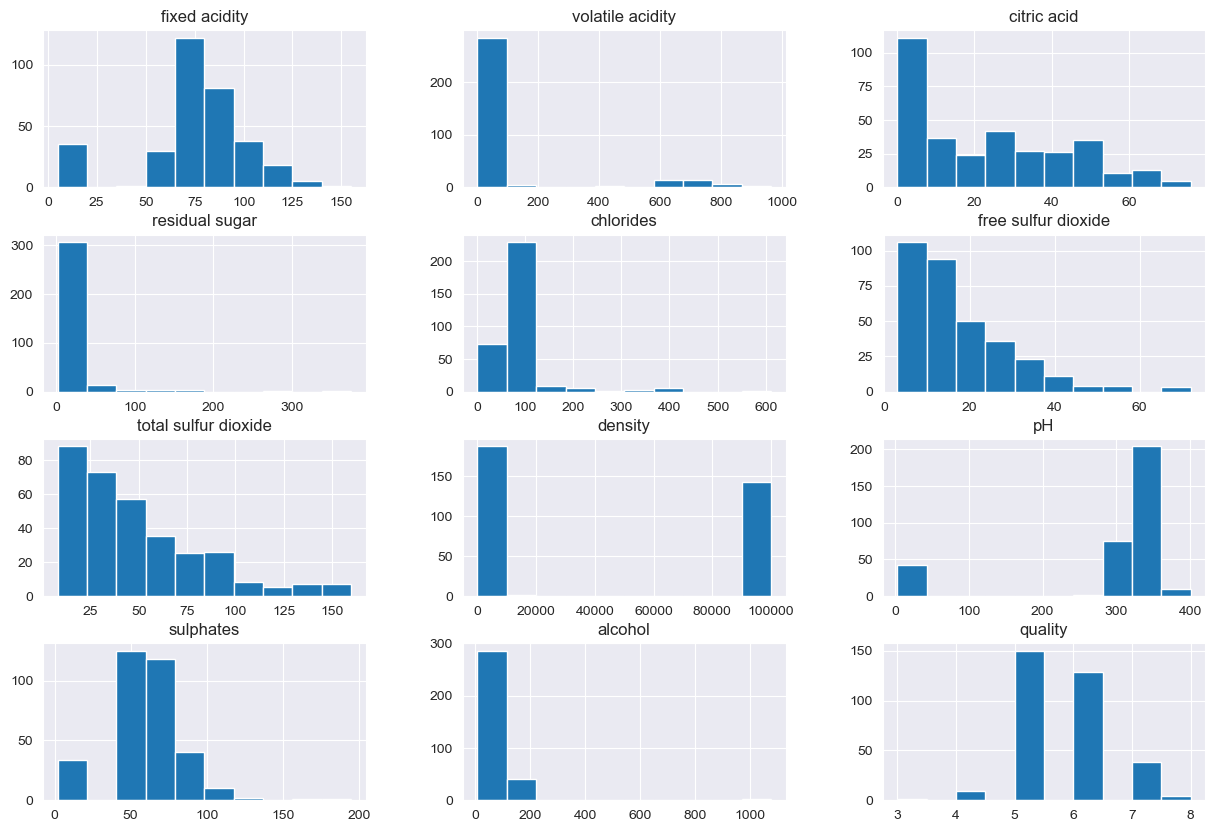

In [8]:
sns.set_style('darkgrid')
df.hist(figsize=(15,10))
plt.show()

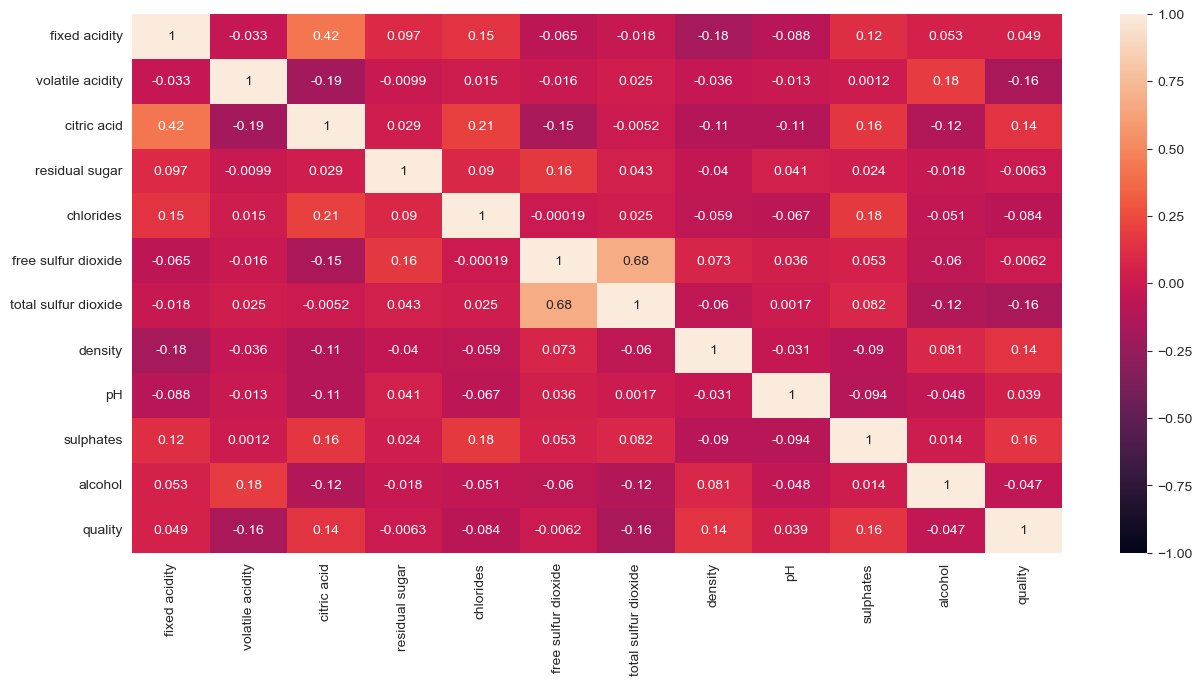

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [10]:
df.isnull().values.any()

True

In [11]:
df_test.isnull().values.any()

False

In [12]:
# Check missing values 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               5
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
#Remover as 5 linhas com nulos
df = df.dropna()

In [30]:
x_train = df.copy(deep=True).drop(columns=['quality'])
for col in x_train.columns:
    x_train[col] = preprocessing.StandardScaler().fit_transform(x_train[[col]])
display(x_train)
#
y_train= df[['quality']].copy(deep=True)
display(y_train)

x_test = df_test.copy(deep=True).drop(columns=['quality'])
for col in x_test.columns:
    x_test[col] = preprocessing.StandardScaler().fit_transform(x_test[[col]])
display(x_test)
#
y_test= df_test[['quality']].copy(deep=True)
display(y_test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.341161,-0.457947,1.600244,-0.165564,-0.150996,-0.005294,0.355984,-1.020178,0.225575,-0.118458,-0.077460
1,-0.695120,2.250893,-1.153201,-0.258197,0.064093,-0.087480,0.325817,-0.823264,0.636398,-0.358815,-0.067888
2,0.504832,-0.301047,-0.268165,0.421110,1.400723,2.871222,2.920139,-0.822317,0.225575,1.083326,-0.134894
3,0.504832,-0.301047,-0.218997,0.451987,-1.042083,2.789036,3.010638,-0.822317,0.235356,1.283624,-0.134894
4,0.032124,-0.407185,0.371027,-0.042054,-0.043452,0.487823,0.687815,-0.822405,0.577709,0.161958,-0.087032
...,...,...,...,...,...,...,...,...,...,...,...
326,-0.404222,-0.411800,-0.464840,-0.072932,-0.719448,-0.169667,-0.699845,1.148544,0.499457,0.161958,0.046981
327,-0.113325,-0.407185,1.010220,0.050579,-0.289268,0.405637,-0.006015,1.148104,-2.542591,0.923088,0.085270
328,-0.331498,2.758512,-1.054864,1.656213,-0.181724,0.980940,0.929148,-0.822515,0.352734,-0.278696,-0.134894
329,-0.767844,-0.245670,-0.710683,-0.227320,0.064093,-0.087480,-0.669678,1.146079,0.724431,-0.198577,0.094843


,quality
0,6
1,5
2,5
3,5
4,5
...,...
326,6
327,6
328,5
329,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.034664,-0.528206,-1.224958,-0.182707,-0.047214,-0.290885,-0.319502,-0.886120,0.560481,-0.152863,-0.059207
1,0.105394,-0.151225,-1.224958,-0.017023,0.389860,0.442091,0.470858,-0.886339,-2.750661,0.343354,-0.010800
2,0.105394,-0.207074,-1.024574,-0.088030,0.270658,-0.081464,0.159504,-1.082698,0.300987,0.219299,-0.010800
3,1.295886,-0.430470,1.580424,-0.182707,-0.067081,0.023247,0.303206,-1.082676,0.197189,-0.070160,-0.010800
4,-0.034664,-0.528206,-1.224958,-0.182707,-0.047214,-0.290885,-0.319502,-0.886120,0.560481,-0.152863,-0.059207
...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.454838,-0.532860,-0.824189,-0.585083,-1.378301,0.808578,-0.079999,-0.886755,0.498202,-0.070160,0.073912
1595,-0.559881,-0.304810,-1.174862,-0.111699,-0.325351,1.175066,0.087653,1.073617,0.570861,0.674165,0.158624
1596,-0.419823,-0.323426,-0.573709,-0.088030,-0.047214,0.651512,-0.175800,1.074974,0.467063,0.632813,-1.063649
1597,-0.559881,2.441097,-0.623805,-0.585083,-0.067081,0.808578,-0.079999,1.074383,0.622759,0.467408,0.037607


,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


quality
5    148
6    127
7     37
4      9
8      4
3      1
Name: count, dtype: int64

In [18]:
y_test['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [31]:
y_train

,quality
0,6
1,5
2,5
3,5
4,5
...,...
326,6
327,6
328,5
329,6


In [33]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train.values.ravel())
RandomForestClassifier(...)
clf.predict(x_train)

[5 5 5 5 5 5 5 5 5 5 6 6 5 5 5 5 5 6 6 6 6 5 5 5 5 5 5 5 5 6 6 6 5 5 5 5 5
 5 5 5 6 5 6 5 5 5 5 5 5 5 6 6 6 5 5 5 5 6 5 5 5 5 5 6 5 6 6 6 5 5 6 5 5 5
 5 5 6 6 6 5 5 6 6 5 5 6 6 5 5 5 6 5 6 5 5 5 5 5 6 5 6 6 6 6 6 5 5 6 6 5 6
 5 5 5 5 5 5 6 6 6 6 5 6 5 6 5 6 5 5 6 5 6 5 5 5 5 6 5 5 5 5 5 5 5 6 6 5 5
 5 5 6 5 5 5 5 5 5 5 5 5 6 6 6 6 5 5 6 6 6 6 6 5 6 5 5 5 6 6 6 5 6 6 5 6 6
 6 6 6 6 6 5 6 5 5 5 5 5 6 6 6 5 6 6 6 6 5 6 6 5 6 6 6 5 5 6 5 6 6 5 6 5 5
 5 5 6 5 6 6 6 5 6 6 5 6 5 6 5 5 5 5 6 5 5 6 5 6 6 6 5 6 5 6 5 6 6 6 6 5 5
 5 6 6 6 5 5 5 6 5 5 5 5 5 6 5 5 5 6 5 6 6 6 5 5 5 5 5 6 6 5 5 6 5 6 6 6 5
 5 6 6 6 6 6 6 6 5 6 6 6 6 5 6 5 6 6 6 6 5 5 5 5 5 6 6 5 6 5]


In [36]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [38]:
pred_train = classifier.predict(x_train)

In [41]:
accuracy_score(y_train, pred_train)

0.9846625766871165

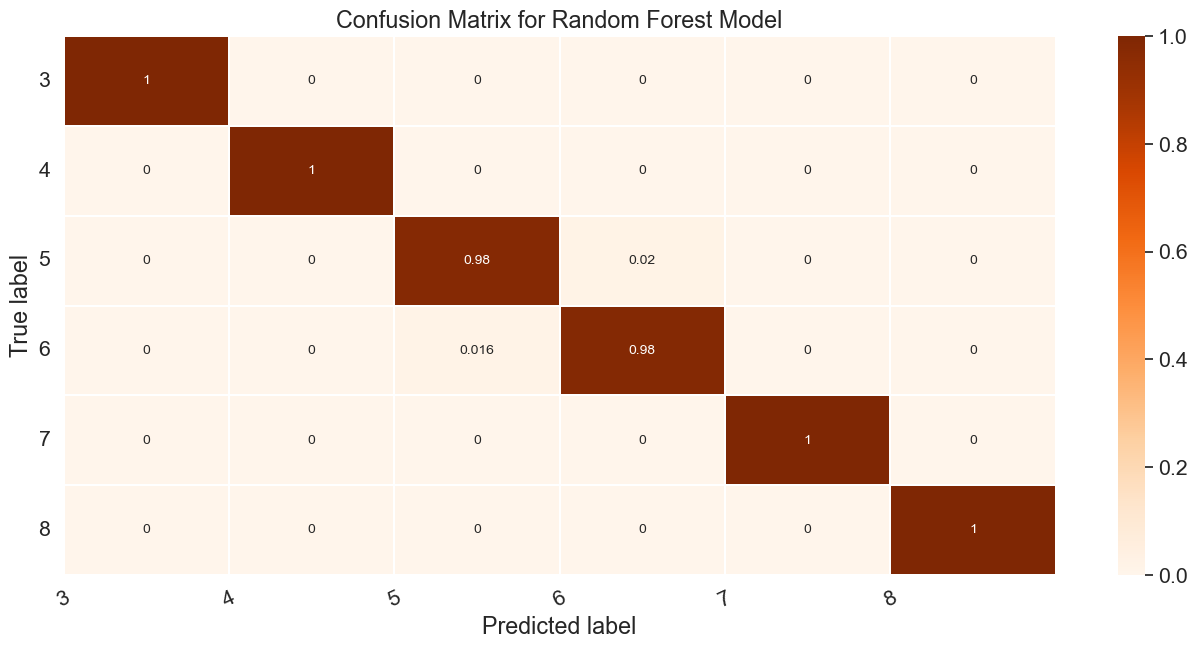

In [47]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_train, pred_train)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Oranges, linewidths=0.2)

# Add labels to the plot
class_names = ['3', '4', '5', 
               '6', '7', '8',]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [48]:
pred_test = classifier.predict(x_test)

In [49]:
accuracy_score(y_test, pred_test)

0.5697310819262039

In [57]:
metrics.confusion_matrix(y_test, pred_test).flatten()

array([  1,   0,   2,   7,   0,   0,   0,   4,  21,  28,   0,   0,   0,
         2, 430, 239,  10,   0,   0,   2, 189, 403,  42,   2,   0,   1,
        31,  96,  71,   0,   0,   0,   2,   8,   6,   2])

In [54]:
# Function to plot a Confusion Matrix
def make_confusion_matrix(predictors, target):
    pred_test = classifier.predict(predictors)
    pred_test = np.round(pred_test)
    cm = metrics.confusion_matrix(target, pred_test)
    
    labels = np.asarray([
        [f'{item}\n{(item / cm.flatten().sum())*100:.2f}%'] for item in cm.flatten()
    ]).reshape(6, 6)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

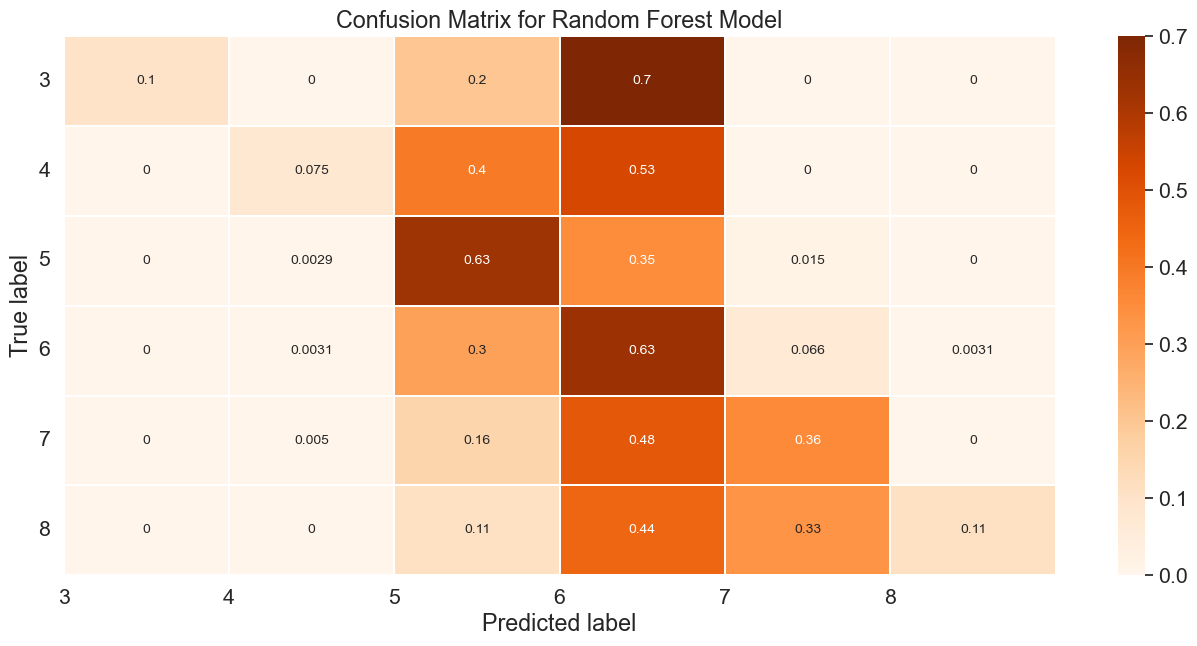

In [53]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Oranges, linewidths=0.2)

# Add labels to the plot
class_names = ['3', '4', '5', 
               '6', '7', '8',]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

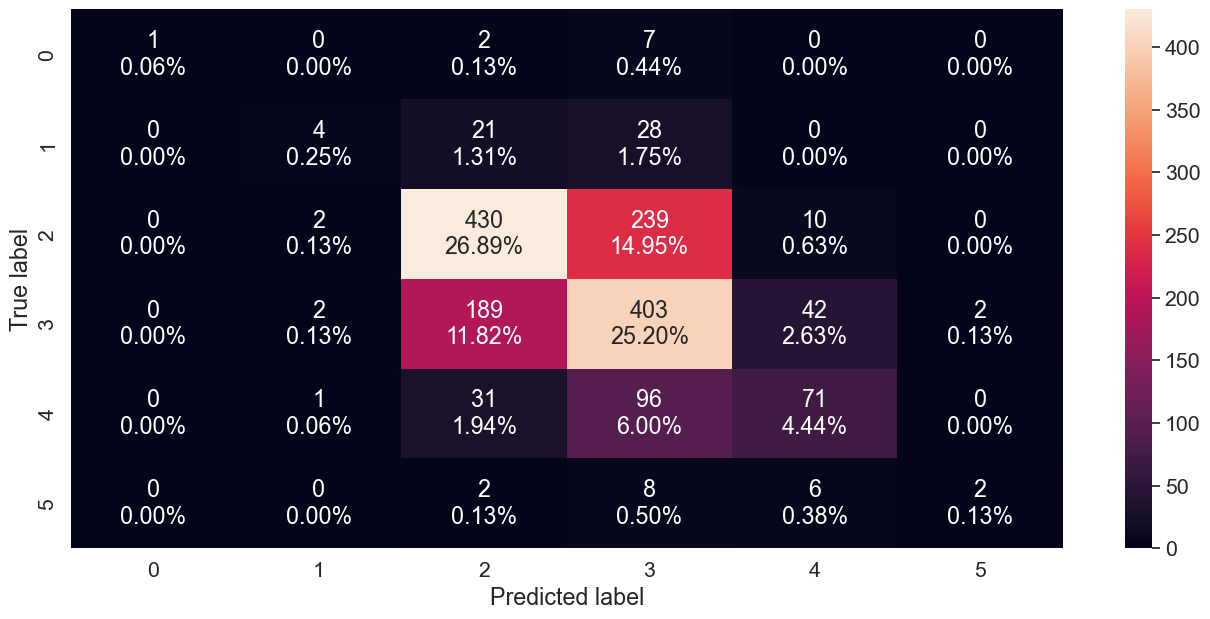

In [55]:
make_confusion_matrix(x_test,y_test)